In [1]:
#Time Series Forecasting means analyzing and modeling time-series data to make future decisions. 
# The ARIMA (Autoregressive Integrated Moving Average) model is a popular statistical technique used for Time Series Forecasting.
# Time Series Data. ARIMA models have three parameters like ARIMA(p, d, q). 
# Here p, d, and q are defined as:

# p is the number of lagged values that need to be added or subtracted from the values (label column). 
# It captures the autoregressive part of ARIMA.
# d represents the number of times the data needs to differentiate to produce a stationary signal. 
# If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1. d captures the integrated part of ARIMA.
# q is the number of lagged values for the error term added or subtracted from the values (label column). 
# It captures the moving average part of ARIMA.

In [2]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

In [3]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today()-timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date=d2

In [4]:
data = yf.download('GOOG',
                   start=start_date,
                   end=end_date,
                   progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
245,2024-04-15,160.279999,160.830002,156.149994,156.330002,156.330002,21140900
246,2024-04-16,155.639999,157.229996,155.050003,156.000000,156.000000,15413200
247,2024-04-17,157.190002,158.681000,156.134995,156.880005,156.880005,16237800
248,2024-04-18,156.925003,158.485001,156.210007,157.460007,157.460007,14016100
249,2024-04-19,157.750000,157.990005,153.910004,155.720001,155.720001,20063900


In [5]:
data = data[["Date", "Close"]]
data.head()

,Date,Close
0,2023-04-24,106.779999
1,2023-04-25,104.610001
2,2023-04-26,104.449997
3,2023-04-27,108.370003
4,2023-04-28,108.220001


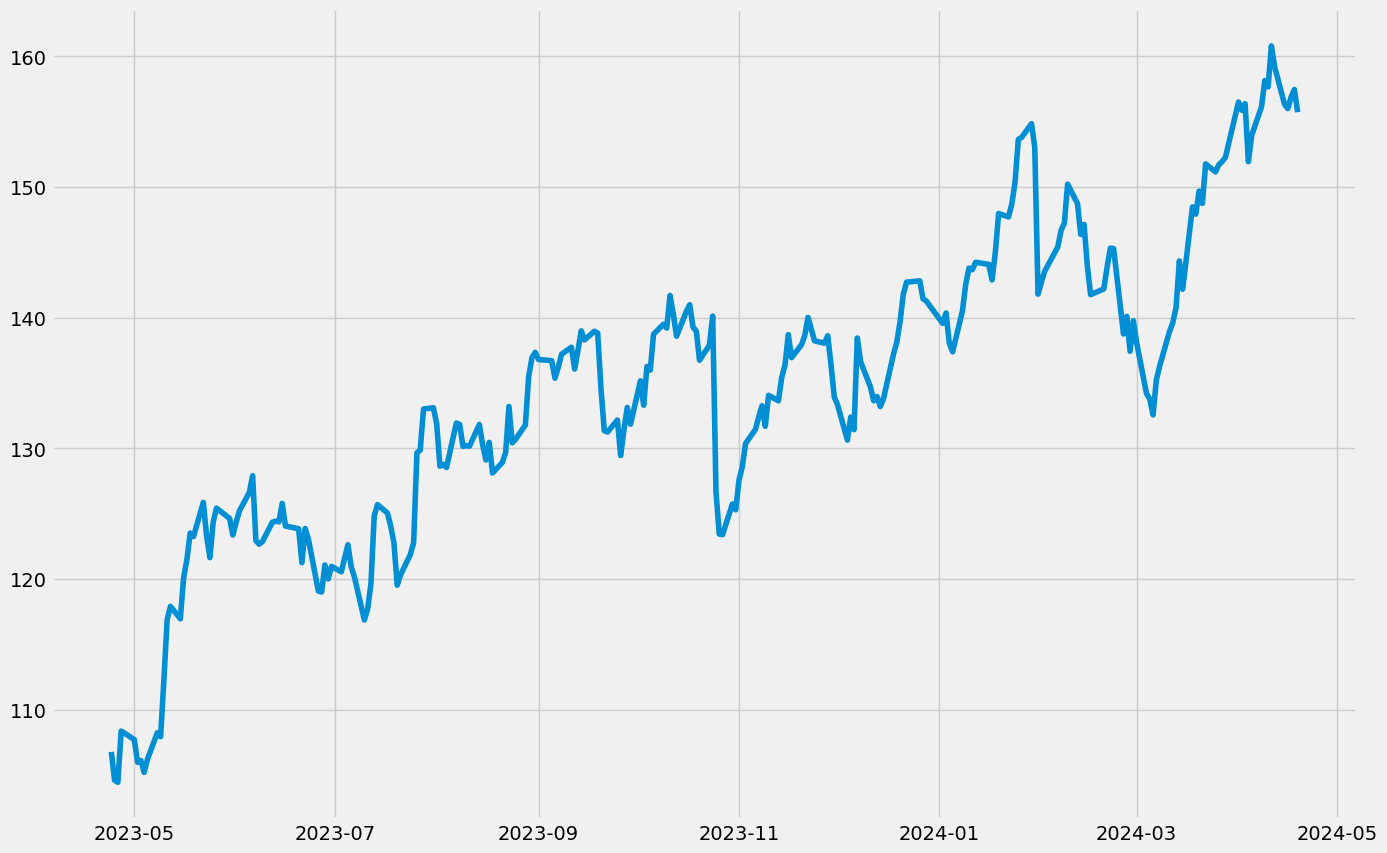

In [6]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

Before using the ARIMA model, we have to figure out whether our data is stationary or seasonal.
To check whether our dataset is stationary or seasonal properly, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals for a better understanding of the time series data

<Figure size 640x480 with 0 Axes>

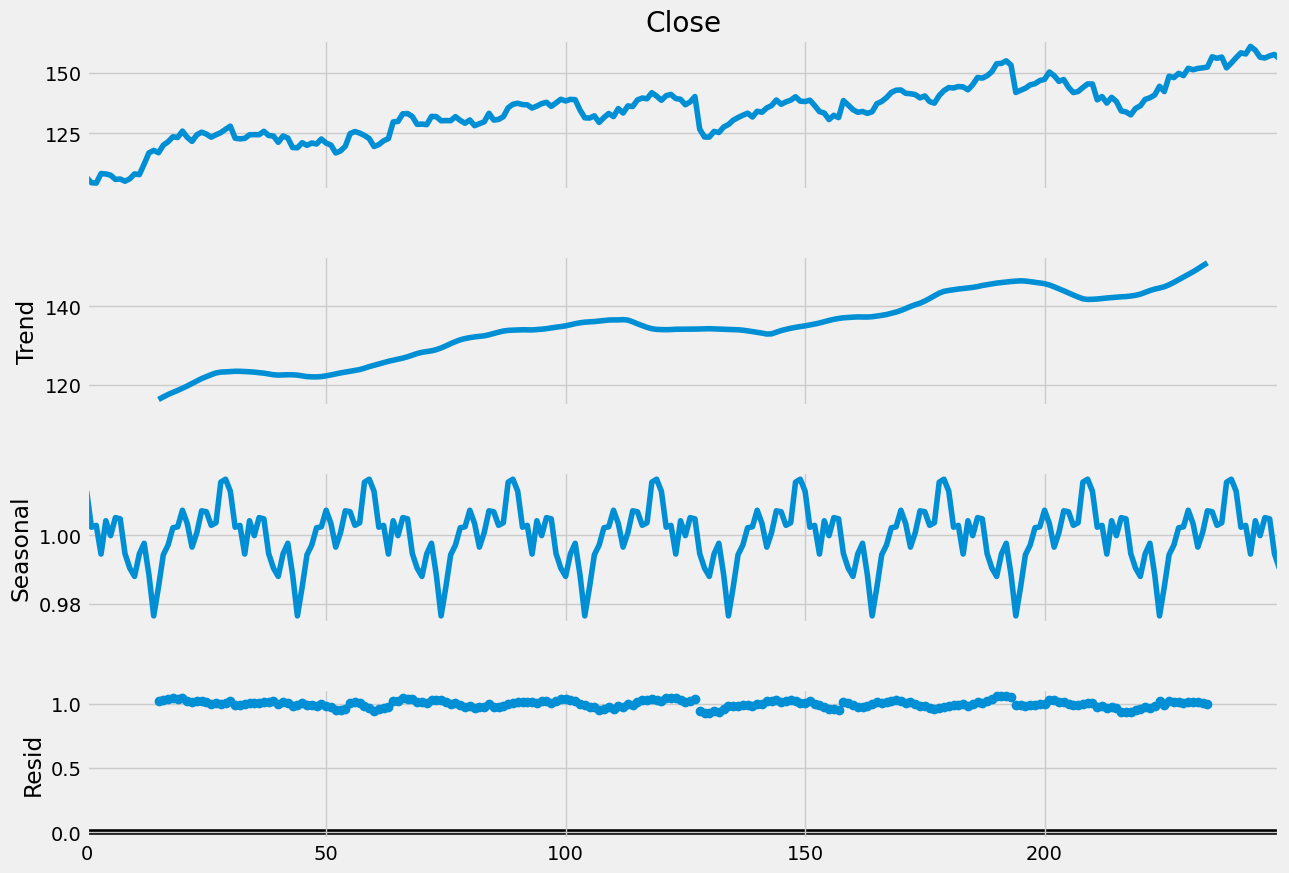

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

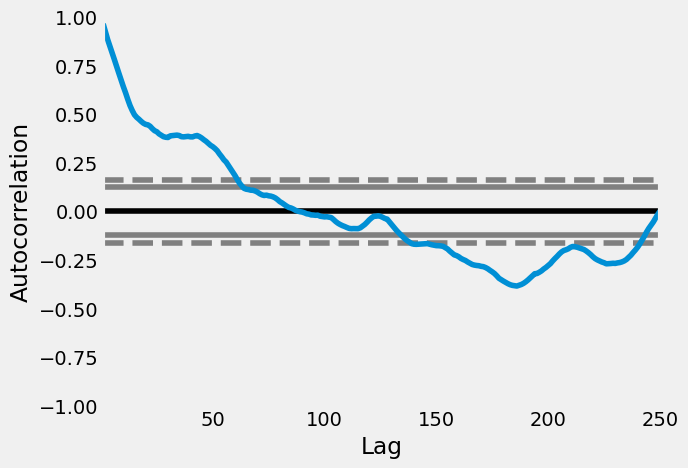

In [13]:
pd.plotting.autocorrelation_plot(data["Close"])

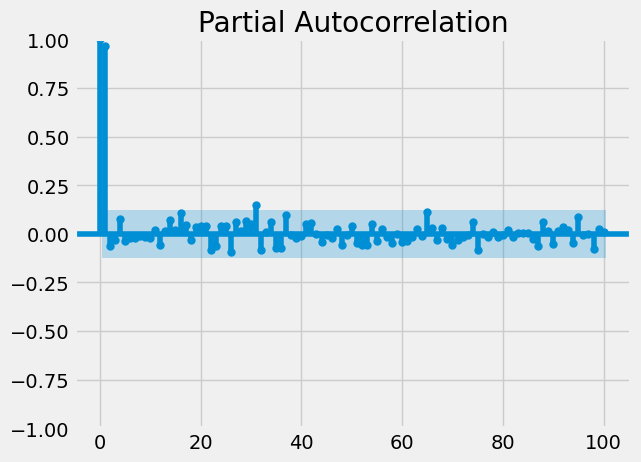

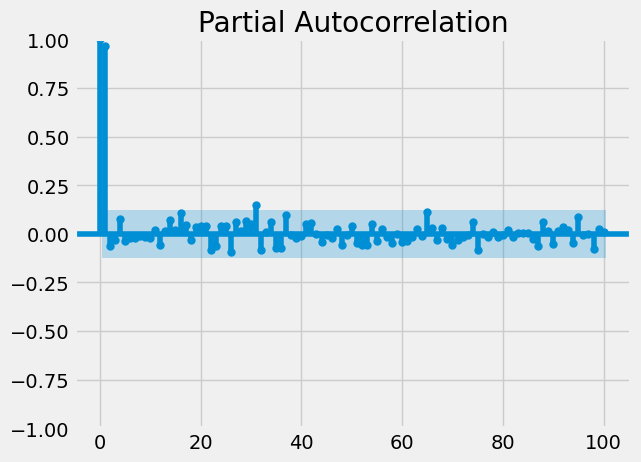

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [18]:
p, d, q = 5, 1, 2
# from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data["Close"], order=(p,d,q))  
fitted = model.fit()  #need to fix this disp=-1
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -559.302
Date:                Mon, 22 Apr 2024   AIC                           1134.604
Time:                        21:41:57   BIC                           1162.744
Sample:                             0   HQIC                          1145.931
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4435      1.414      0.314      0.754      -2.327       3.214
ar.L2         -0.1423      1.291     -0.110      0.912      -2.674       2.389
ar.L3         -0.1005      0.099     -1.020      0.3

c:\Users\ipek\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ipek\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [19]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      106.780007
2      104.580168
3      104.372771
4      108.623803
          ...    
245    159.168453
246    155.757460
247    156.065565
248    156.966398
249    157.505361
Name: predicted_mean, Length: 250, dtype: float64


In [20]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit() 
print(model.summary())

c:\Users\ipek\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ipek\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -544.648
Date:                            Mon, 22 Apr 2024   AIC                           1119.296
Time:                                    21:42:43   BIC                           1171.317
Sample:                                         0   HQIC                          1140.264
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2146      0.268      4.539      0.000       0.690       1.739
ar.L2         -0.7510      0.256   

In [21]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

250    157.054707
251    157.840889
252    160.057402
253    160.280453
254    159.901992
255    159.399037
256    159.475208
257    160.155090
258    160.882191
259    160.773950
260    159.504841
Name: predicted_mean, dtype: float64


<Axes: >

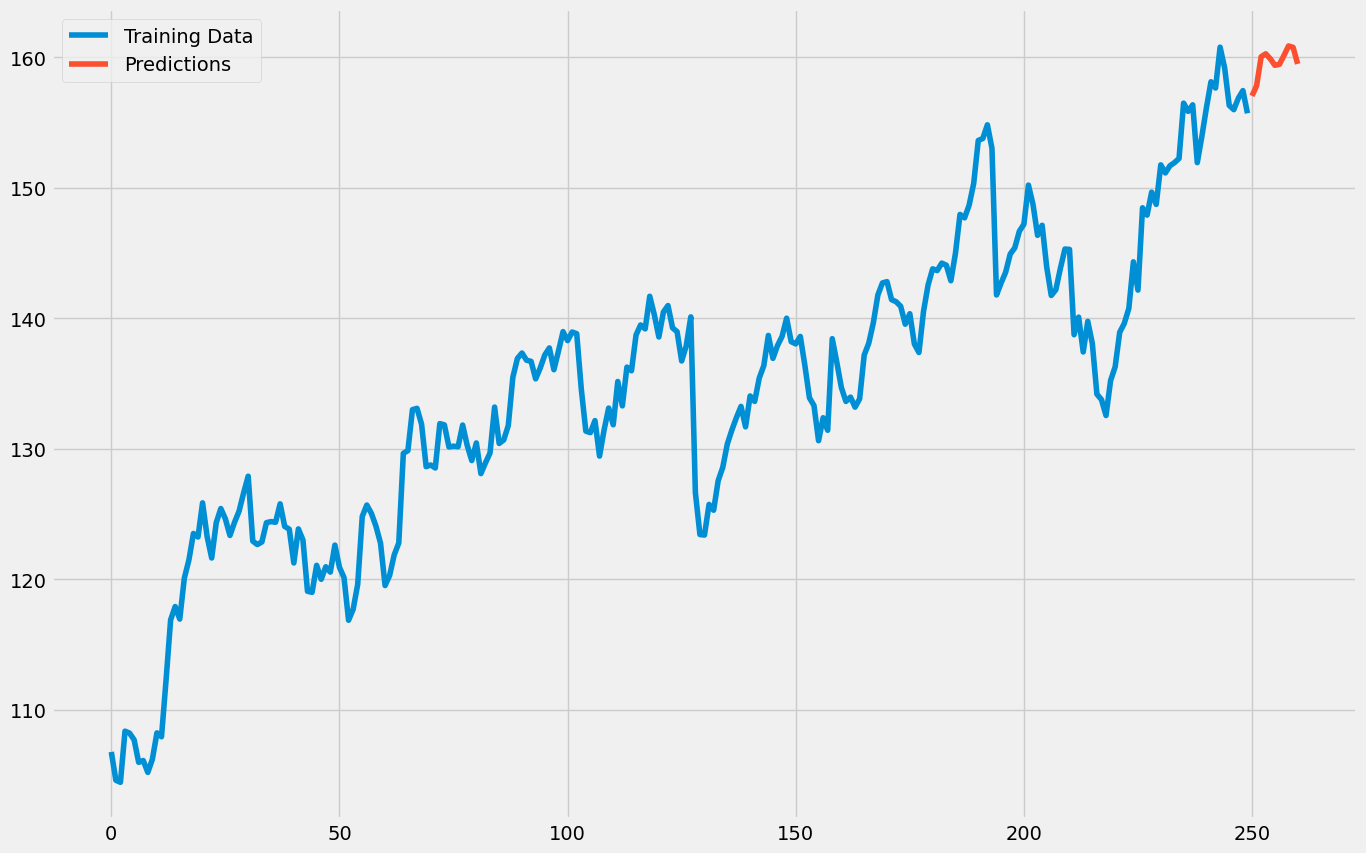

In [22]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")